# Module 1: Create and visualize embeddings for your dataset

In this notebook, we will generate embedding for a specific dataset, persist embedding in pgvector/Aurora and create HNSW and IVVFlat indexes. Finally, visualize embedding through TSN-E.

1. [Download Dataset](#test)
2. [Generate Embeddings using Amazon Titan Text Embeddings Model](#test)
3. [Create Indexes in pgvector for HNSW and IVFLAT](#test)
4. [Visualize Embeddings using t-SNE](#test)

### Setup

In [ ]:
!pip install langchain langchain-postgres langchain-aws langchain-community PyPDF2 --quiet

In [ ]:
%pip install --upgrade sagemaker --quiet
%pip install pandas --quiet
%pip install numexpr --quiet
%pip install scikit-learn --quiet
%pip install matplotlib --quiet
%pip install seaborn --quiet
%pip install matplotlib --quiet

In [9]:
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt 
from IPython.display import display
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from sklearn.manifold import TSNE

In [10]:
import boto3
import json
import os
import io
import collections
from langchain_core.documents import Document

In [11]:
s3_client = boto3.client("s3")
bedrock_client = boto3.client("bedrock-runtime")

embeddings_model_id = "amazon.titan-embed-text-v2:0"
s3_bucket = ""
s3_path = ""

### Download Dataset

In [ ]:
#TODO: copy code from other module to here on which s3 bucket to use and download a single file for this module

### Initiate Connection to pgvector

In [ ]:
#TODO: copy code from other module to here to connect to pgvector through secrets

### Generate Embeddings using Amazon Titan Text Embeddings Model

In [15]:
import json
import logging
import boto3
from botocore.exceptions import ClientError

def generate_embeddings(model_id, body):
    """
    Generate a vector of embeddings for a text input using Amazon Titan Text Embeddings G1 on demand.
    Args:
        model_id (str): The model ID to use.
        body (str) : The request body to use.
    Returns:
        response (JSON): The embedding created by the model and the number of input tokens.
    """

    bedrock = boto3.client(service_name='bedrock-runtime')

    accept = "application/json"
    content_type = "application/json"

    response = bedrock.invoke_model(
        body=body, modelId=model_id, accept=accept, contentType=content_type
    )

    response_body = json.loads(response.get('body').read())

    return response_body

In [32]:
# TODO: replace this below code to generate embeddings to an entire file from s3
# test the embeddings generated
input_text = "What are the different services that you offer?"
# Create request body.
body = json.dumps({"inputText": input_text, "dimensions": 512, "normalize": True})

try:
    response = generate_embeddings(embeddings_model_id, body)

    print(f"Generated embeddings: {response['embedding']}")
    print(f"Input Token count:  {response['inputTextTokenCount']}")

except ClientError as err:
    message = err.response["Error"]["Message"]
    print("A client error occured: " + format(message))

else:
    print(
        f"Finished generating embeddings with Amazon Titan Text Embeddings V2 model {embeddings_model_id}."
    )

Generated embeddings: [-0.18960579, 0.010045986, 0.013264602, -0.017458558, 0.014239941, -0.009607083, 0.024773596, 0.017361024, -0.06593288, 0.0065347673, 0.0033649176, -0.07100464, -0.08348897, -0.028479882, 0.015020211, 0.08661005, 0.06710328, 0.015702948, 0.09870425, 0.04213462, -0.05227814, 0.032381237, 0.06983423, 0.03355164, 0.024968663, -0.03725793, 0.012094196, 0.051107734, 0.12952495, -0.10065492, -0.014239941, 0.044280365, 0.03608752, 0.07373559, 0.009314482, 0.035697386, 0.03706286, 0.090511404, -0.027504543, 0.01599555, 0.024188392, 0.039403673, 0.0013471862, -0.020482106, 0.028870016, 0.045645837, 0.062421657, 0.029065086, -0.0025602633, -0.028870016, 0.039988875, 0.05461895, -0.003291767, 0.05227814, 0.04896199, -0.02389579, -0.043109957, 0.029065086, -0.044280365, -0.03550232, -0.012972001, 0.05227814, 0.009119414, -0.02691934, 0.09909438, 0.020872243, -0.0027675228, -0.032576304, -0.022432784, 0.05032746, -0.061251253, 0.033161506, 0.0694441, 0.08231856, 0.014435008, -

### Store embeddings into pgvector

In [ ]:
#TODO : copy the code from the other module to here - To store the generated embeddings of a single file into pgvector from s3

### Evalute Embeddings through similarity search

In [ ]:
#TODO: retrieve the embeddings from pgvector for a user question with different k values (2, 5, 10)

### Visualize Embeddings using t-SNE

In [23]:
import pandas as pd

def get_embeddings_df(texts):
    df = pd.DataFrame(texts, columns=["text"])
    df["embedding"] = df["text"].apply(lambda text: generate_embeddings(embeddings_model_id, json.dumps({"inputText": text, "dimensions": 512, "normalize": True})).get('embedding'))
    return df

In [24]:
# TODO: this should be replaced by the question and answers (the answers will contain k=10 values and the graph below will show how close the answers are to the user question)
texts = [
    "How do I create an RDS instance with pg vector?",
    "Which version of pgvector is supported?",
    "RDS, DynamoDB, and Neptune",
    "Difference between Relational database, key-value database, and graph database",
    "What are the steps to create a PostgreSQL database?",
    "Supported versions of pgvector on AWS RDS",
    "What are the key differences between RDS and DynamoDB?",
    "Can I use Neptune for graph databases?",
    "Relational vs non-relational databases comparison",
    "How does pgvector work with AWS RDS?",
    "Is pgvector compatible with relational databases?",
]

df = get_embeddings_df(texts)
display(df)

,text,embedding
0,How do I create an RDS instance with pg vector?,"[-0.05730939, 0.038736902, 0.020695057, 0.0157..."
1,Which version of pgvector is supported?,"[-0.11440643, 0.06902734, -0.010705629, 0.0402..."
2,"RDS, DynamoDB, and Neptune","[-0.07085261, -0.041724313, 0.019287655, -0.00..."
3,"Difference between Relational database, key-va...","[-0.018692689, -0.049055945, -0.01651682, 0.04..."
4,What are the steps to create a PostgreSQL data...,"[-0.04442747, 0.055851676, 0.0536303, 0.026021..."
5,Supported versions of pgvector on AWS RDS,"[-0.09288143, 0.0036735332, 0.0074377707, -0.0..."
6,What are the key differences between RDS and D...,"[-0.044719025, -0.051107455, -0.019325007, 0.0..."
7,Can I use Neptune for graph databases?,"[-0.09765022, 0.009580226, 0.01488096, -0.0211..."
8,Relational vs non-relational databases comparison,"[-0.036274504, 0.018453598, 0.014973777, 0.068..."
9,How does pgvector work with AWS RDS?,"[-0.09197187, 0.025506368, 0.009401983, 0.0215..."


In [30]:
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt

def show_tsne_plot(df):
    embeddings = np.array(df["embedding"].tolist())

    tsne = TSNE(n_components=2, learning_rate="auto", init="random", random_state=4, perplexity=3)
    embeddings_2d = tsne.fit_transform(embeddings)

    # plot
    plt.figure(figsize=(12, 8))
    plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c="blue", alpha=0.6, label="Embeddings")

    for i, txt in enumerate(df["text"]):
        plt.annotate(
            txt, (embeddings_2d[i, 0], embeddings_2d[i, 1]), textcoords="offset points", xytext=(0, 5), ha="center"
        )

    similarity_matrix = cosine_similarity(embeddings)

    # lines
    for i in range(len(embeddings_2d)):
        for j in range(i+1, len(embeddings_2d)):  # avoid repeating the same pair
            sim = similarity_matrix[i, j]
            # higher similarity = bolder lines
            alpha = sim 
            if sim > 0:  # plot lines for positive similarity values
                plt.plot(
                    [embeddings_2d[i, 0], embeddings_2d[j, 0]],
                    [embeddings_2d[i, 1], embeddings_2d[j, 1]],
                    color='gray', linestyle='-', alpha=alpha, linewidth=2*sim
                )

    plt.title("2D Visualization of Text Embeddings using t-SNE with Cosine Similarity")
    plt.legend()
    plt.show()

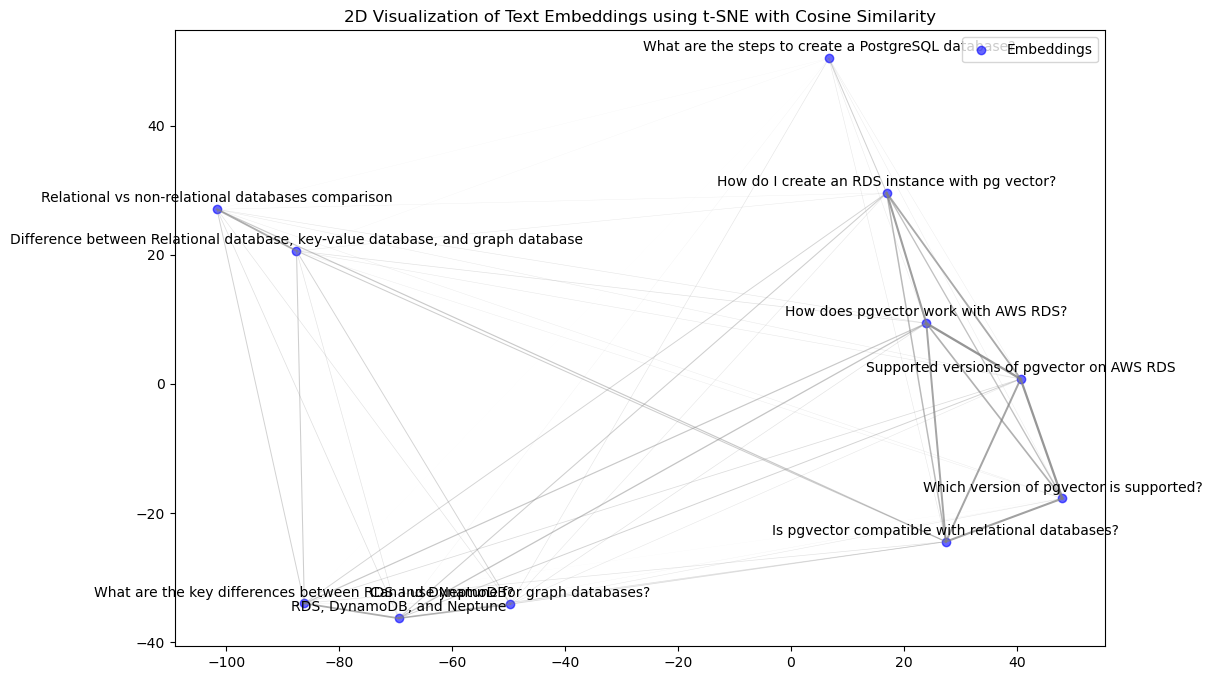

In [31]:
show_tsne_plot(df)